# Calculating Spectral Irradiance using SPCTRAL 2

SPCTRAL 2 is a clear-sky spectral irradiance model that accounts for variations in the atmospheric conditions and air-mass.  Developed at NREL in 1984, it generates terrestrial spectral irradiance from 300nm to 4um with a resolution of approximately 10nm.

_"Simple Solar Spectral Model for Direct and Diffuse Irradiance on Horizontal and Tilted Planes at the Earth's Surface for Cloudless Atmospheres", R. Bird, C. Riordan, December 1984_

The Solcore implementation accomodates the following inputs (stated values are
defaults):

- latitude : 0.9143779951198293 degrees
- longitude : -0.02722713633111154 degrees
- dateAndTime : datetime.datetime(2011, 6, 30, 12, 30)
- aod_model: 'rural'
- pressure: 103000.0 hPa
- humidity: 0.3, 
- precipwater: 0.00142 cm
- ozone: 0.00034 cm
- turbidity: 0.15

All the inputs are numeric other than the aod_model whose options are: 'rural',
'urban', 'maritime' and 'tropospheric'.

## Comparison between SPCTRAL2 with default parameters and AM1.5G 

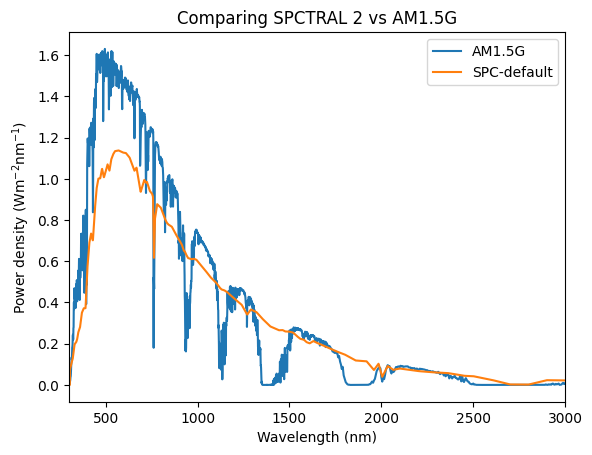

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solcore.light_source import LightSource

# Setup the AM1.5G solar spectrum
wl = np.linspace(300, 4000, 4000) * 1e-9    #wl contains the x-ordinate in wavelength
am15g = LightSource(source_type='standard', x=wl * 1e9, version='AM1.5g')

spc2default = LightSource(source_type='SPECTRAL2',  x=wl * 1e9)

plt.figure()
plt.title("Comparing SPCTRAL 2 vs AM1.5G")
plt.plot(*am15g.spectrum(wl*1e9), label='AM1.5G')
plt.plot(*spc2default.spectrum(wl*1e9), label='SPC-default')
plt.xlim(300, 3000)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power density (Wm$^{-2}$nm$^{-1}$)')
plt.legend()


## Adjusting the precipitable water value

The default SPCTRAL2 parameters results in almost no atmospheric absorption. This suggests the precipitable water column thickness is much too low, the default is 0.00142 cm.  Let's increase that value to 1cm to roughly match AM1.5G:

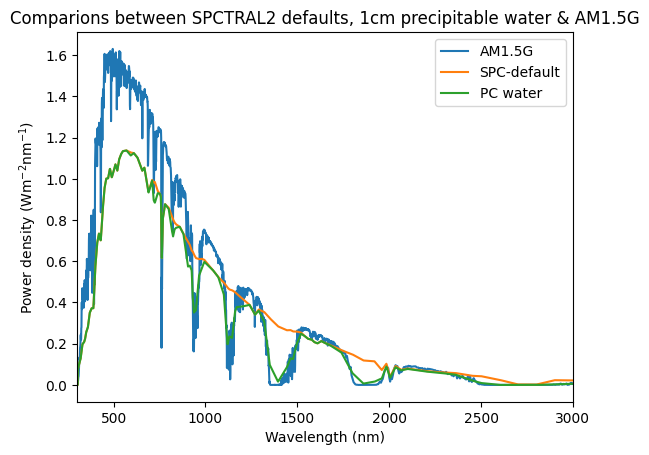

In [3]:
spc2pc = LightSource(source_type='SPECTRAL2', precipwater=1.0, x=wl * 1e9)

plt.figure()
plt.title('Comparions between SPCTRAL2 defaults, 1cm precipitable water & AM1.5G')
plt.plot(*am15g.spectrum(wl*1e9), label='AM1.5G')
plt.plot(*spc2default.spectrum(wl*1e9), label='SPC-default')
plt.plot(*spc2pc.spectrum(wl*1e9), label='PC water')

plt.xlim(300, 3000)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power density (Wm$^{-2}$nm$^{-1}$)')
plt.legend()

## Atmospheric Turbidity

The short wavelength is attenuated which is likely due to a high level of aerosol
loading in the default spectrum.  To address this atmospheric turbidity can be reduced to around 0.05.

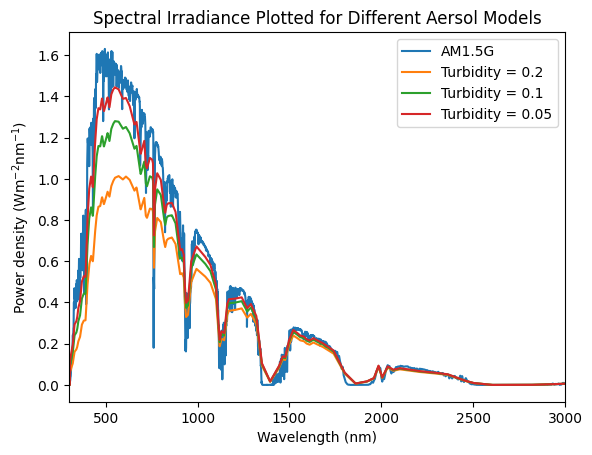

In [ ]:
spc2high = LightSource(source_type='SPECTRAL2', precipwater=1.0, turbidity=0.2, x=wl * 1e9)
spc2med = LightSource(source_type='SPECTRAL2', precipwater=1.0, turbidity=0.1, x=wl * 1e9)
spc2low = LightSource(source_type='SPECTRAL2', precipwater=1.0, turbidity=0.05, x=wl * 1e9)

plt.figure()
plt.title('Spectral Irradiance Plotted for Different Aersol Models')
plt.plot(*am15g.spectrum(wl*1e9), label='AM1.5G')
plt.plot(*spc2high.spectrum(wl*1e9), label='Turbidity = 0.2')
plt.plot(*spc2med.spectrum(wl*1e9), label='Turbidity = 0.1')
plt.plot(*spc2low.spectrum(wl*1e9), label='Turbidity = 0.05')
plt.xlim(300, 3000)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power density (Wm$^{-2}$nm$^{-1}$)')
plt.legend()

## Variation with Aerosol models

Several standard aerosol models are implemented in SPCTRAL 2 that were established by Shettle & Fenn.  

_Shettle, E. P., and R. W. Fenn, "Models of the Atmospheric Aerosol and Their Optical Properties, II Proceedings of the Advisory Group for Aerospace Reseach and Development Conference No . 183, Optical Propagation in the Atmosphere, 1975, pp. 2.1-2.16. Presented at the Electromagnetic Wave Propagation Panel Symposium, Lyngby, Denmark; 27-31 October 1975._

Here we plot some of them with a turbidity of 0.2 to emphasise the different spectral behaviour:

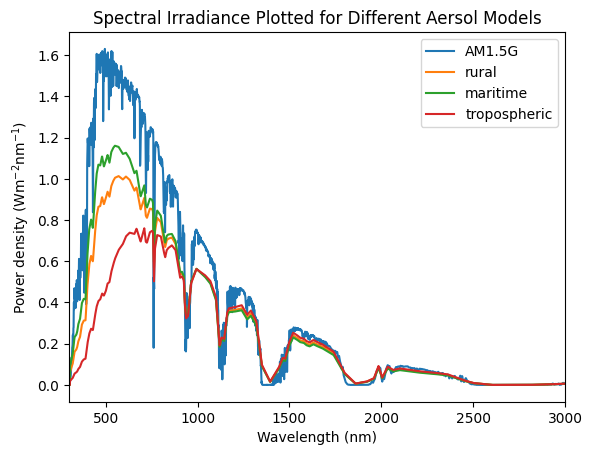

In [ ]:
spc2rural = LightSource(source_type='SPECTRAL2', precipwater=1.0, turbidity=0.2,
                        aod_model='rural', x=wl * 1e9)
spc2marit = LightSource(source_type='SPECTRAL2', precipwater=1.0, turbidity=0.2,
                        aod_model='maritime', x=wl * 1e9)
spc2tropo = LightSource(source_type='SPECTRAL2', precipwater=1.0, turbidity=0.2,
                        aod_model='tropospheric', x=wl * 1e9)

plt.figure(1)
plt.title('Spectral Irradiance Plotted for Different Aersol Models')
plt.plot(*am15g.spectrum(wl*1e9), label='AM1.5G')
plt.plot(*spc2rural.spectrum(wl*1e9), label='rural')
plt.plot(*spc2marit.spectrum(wl*1e9), label='maritime')
plt.plot(*spc2tropo.spectrum(wl*1e9), label='tropospheric')
plt.xlim(300, 3000)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power density (Wm$^{-2}$nm$^{-1}$)')
plt.legend()

## Changing the time of day

One of the most common uses for a spectral irradiance model such as SPCTRAL2 is to
calculate how a particular solar cell technology behaves under varying spectral conditions during the day.  This is particularly important whan working with series connected tandem solar cells where the current matching condition will vary according to the incident spectrum. Here we plot the spectral irradiance at 12pm, 2pm, 3pm, 4pm, 5pm, 6pm and 7pm.  Note the strong relative loss in short-wavelength light relative to the infrared as the air-mass increases throughout the afternoon.

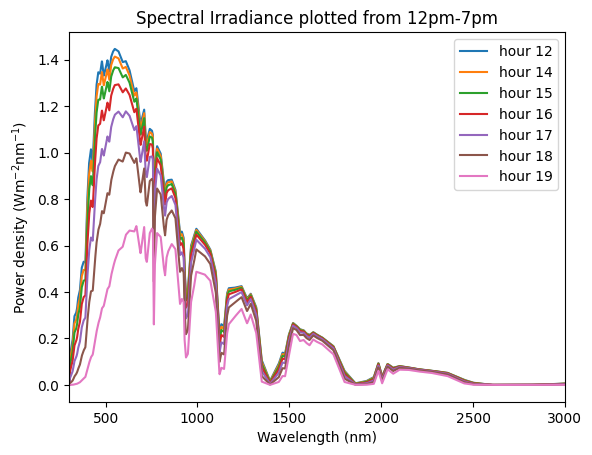

In [ ]:
import datetime

plt.figure(1)
plt.title('Spectral Irradiance plotted from 12pm-7pm')
hours=[12, 14, 15, 16, 17, 18, 19]

for h in hours:
    spc2 = LightSource(source_type='SPECTRAL2', dateAndTime=datetime.datetime(2011, 6, 30, h, 00),
                       precipwater=1.0, turbidity=0.05, x=wl * 1e9)
    plt.plot(*spc2.spectrum(wl*1e9), label='hour '+ str(h))

plt.xlim(300, 3000)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power density (Wm$^{-2}$nm$^{-1}$)')
plt.legend()